<a href="https://colab.research.google.com/github/ctarisai/Heart-Disease-Machine-Learning-Project/blob/main/APDS_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AP4DS Assignment

**Dataset**:       HEART DISEASE

**Use of Generative AI**:  The Generative AII built in on Colab was used to set up the pipelines for the ML


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [ ]:
# Data and Datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import DBSCAN

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

#ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



## Loading the dataset


### The dataset

This dataset comprises 920 entries and 14 features, including both continuous and categorical variables, all represented numerically. The 10 `float64` features capture continuous clinical metrics, such as `resting_blood_pressure`, `serum_cholesterol`, and `st_depression`, which are key indicators of heart health. The 4 `int64` features, including `age`, `gender`, `chest_pain_type`, and the target variable `class`, represent discrete or categorical data. Notably, categorical variables such as `chest_pain_type` and `gender` are encoded as integers, necessitating preprocessing to ensure the model correctly interprets their discrete nature rather than treating them as ordinal or continuous.

With 920 rows, this dataset can be considered moderate in size, sufficient for exploratory data analysis and initial machine learning experiments. However, the relatively high dimensionality (14 features) compared to the number of samples necessitates careful feature selection or dimensionality reduction to prevent overfitting. Additionally, the dataset’s structure—particularly the numeric encoding of all features—requires a nuanced approach to data preprocessing, including imputation for missing values and one-hot encoding or similar techniques for categorical variables, to optimize model performance and interpretability.

In [ ]:
# loading the dataset into a variable called 'df' (short for DataFrame, a Pandas data structure)
path = "/content/drive/MyDrive/Assignments/AP4DS/heart-disease.csv"
df = pd.read_csv(path)
df_original = df.copy() #the raw dataset is preserved, any modifications will happen to df or df_cleaned

# printing out dataset info
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           920 non-null    int64  
 1   gender                        920 non-null    int64  
 2   chest_pain_type               920 non-null    int64  
 3   resting_blood_pressure        861 non-null    float64
 4   serum_cholesterol             890 non-null    float64
 5   fasting_blood_sugar           830 non-null    float64
 6   resting_electrocardiographic  918 non-null    float64
 7   max_heart_rate                865 non-null    float64
 8   exercise_induced_angina       865 non-null    float64
 9   st_depression                 858 non-null    float64
 10  st_segment                    611 non-null    float64
 11  num_major_vessels             309 non-null    float64
 12  thal                          434 non-null    float64
 13  class

,age,gender,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,st_depression,st_segment,num_major_vessels,thal,class
0,63,1,4,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1.0,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,NaN,0


### Fact Sheet

In [ ]:
import pandas as pd

consolidated_facts = {
    'Metric': [
        'Number of Rows',
        'Number of Columns',
        'Number of Numeric Columns',
        'Number of Non-Numeric Columns',
        'Feature Types',
        'Missing Values'
    ],
    'Value': [
        df.shape[0],
        df.shape[1],
        df.select_dtypes(include='number').shape[1],
        df.select_dtypes(exclude='number').shape[1],
        dict(df.dtypes.value_counts()),
        df.isnull().sum().to_dict()
    ]
}

consolidated_df = pd.DataFrame(consolidated_facts)

def style_table(val):
    style = ''

    if isinstance(val, dict):
        style += 'background-color: lightblue; color: darkblue; '

    elif isinstance(val, int) and val == 0:
        style += 'background-color: lightgreen; color: darkgreen; '

    elif isinstance(val, int) and val > 10:
        style += 'background-color: lightcoral; color: darkred; '

    if isinstance(val, int) and val != 0:
        style += 'background-color: lightyellow; color: darkorange; '

    return style

def stripe_rows(x):
    return ['background-color: #f2f2f2' if i % 2 else '' for i in range(len(x))]

styled_df = consolidated_df.style.applymap(style_table, subset=['Value']) \
                                 .apply(stripe_rows, axis=1) \
                                 .set_table_styles([
                                     {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
                                     {'selector': 'td', 'props': [('padding', '10px'), ('border', '1px solid #ddd')]},
                                     {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
                                     {'selector': 'tr:hover', 'props': [('background-color', '#ddd')]}  # Hover effect for rows
                                 ])

styled_df

<ipython-input-182-ad452c39616c>:44: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Metric,Value
0,Number of Rows,920
1,Number of Columns,14
2,Number of Numeric Columns,14
3,Number of Non-Numeric Columns,0
4,Feature Types,"{dtype('float64'): 10, dtype('int64'): 4}"
5,Missing Values,"{'age': 0, 'gender': 0, 'chest_pain_type': 0, 'resting_blood_pressure': 59, 'serum_cholesterol': 30, 'fasting_blood_sugar': 90, 'resting_electrocardiographic': 2, 'max_heart_rate': 55, 'exercise_induced_angina': 55, 'st_depression': 62, 'st_segment': 309, 'num_major_vessels': 611, 'thal': 486, 'class': 0}"


## Data Properties






In [ ]:
print("\nStatistics (of numeric features)\n")
df.describe()




Statistics (of numeric features)



,age,gender,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,st_depression,st_segment,num_major_vessels,thal,class
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
print("\nInfo about the class\n")
df['class'].describe(),"\n"

print(df['class'].value_counts())
df['class'].value_counts().sort_index(ascending=True).to_frame().style.bar(vmin=0, vmax=len(df))


Info about the class

class
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


,count
class,
0,411
1,265
2,109
3,107
4,28


Text(0, 0.5, 'Class')

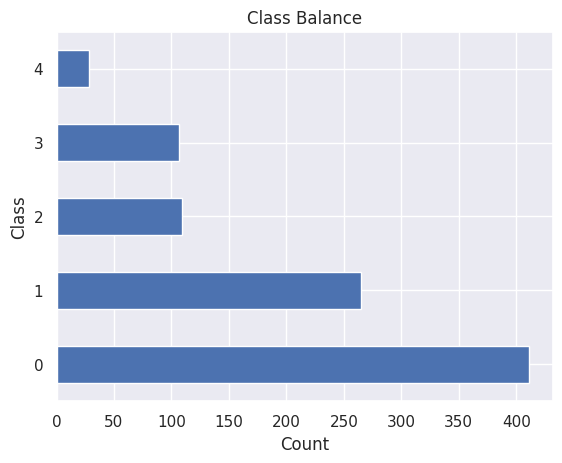

In [ ]:
sns.set_theme()

df['class'].value_counts().plot(kind='barh', title='Class Balance')
plt.xlabel('Count')
plt.ylabel('Class')

**From the above we can make the following key observations:**

*   Class 0 has the highest representation with 411 samples, accounting for a significant portion of the dataset. This indicates that this is the majority class
*   There is a noticeable imbalance between the classes. For instance, Class 4 has only 28 samples, which is significantly fewer than Class 0.
*  Classes 4, 3, and 2 have relatively low representation compared to Classes 0 and 1. This could lead to challenges in training a model, as the minority classes might be underrepresented during training if not addressed.






### **Data quality**

Data quality is a critical factor in the success of any machine learning (ML) project, particularly in sensitive applications like predicting the presence of heart disease. Before applying an ML model we have to address the dataset's challenges.

Missing data is one of the most significant concerns in this dataset. Key features, such as `num_major_vessels` (66.4% missing) and `thal` (52.8% missing), have substantial gaps that can severely affect model accuracy. High levels of missingness in critical features like these may reduce the predictive power of the model or lead to biases if not addressed appropriately. For example, imputing these values incorrectly could distort relationships between features, while excluding them entirely may discard essential information. Similarly, features like `st_segment` (33.6% missing) and `resting_blood_pressure` (6.4% missing) highlight the need for a tailored preprocessing strategy.

The dataset's structure also raises potential interpretability challenges. Although all 14 columns are numeric, it is unclear whether categorical features, such as `thal`, have been encoded as numbers. Without careful consideration, this could mislead the model into treating categorical variables as continuous, impacting its ability to learn meaningful patterns.

Data imbalance in the target variable, `class`, is another potential issue. If the labels for heart disease are not evenly distributed, the model might become biased toward the majority class, leading to poor generalization for underrepresented outcomes. Investigating and, if necessary, addressing class imbalance is crucial before training any ML algorithm.

These data quality issues underscore the importance of thorough preprocessing and exploratory data analysis before deploying a machine learning model. Steps like imputing or excluding missing values, ensuring feature interpretability, and addressing potential class imbalance are vital to build a robust and reliable model. Without tackling these challenges, even advanced ML techniques may fail to provide accurate or actionable predictions.

- Data quality issues with missing values,noise and duplicates

#### Duplicates

- There are no duplicates in this dataset as seen below

In [ ]:
print(f"Number of duplicate rows: {df_original.duplicated().sum()}")

Number of duplicate rows: 2


In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,age,gender,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,st_depression,st_segment,num_major_vessels,thal,class
187,58,1,3,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,2
605,49,0,2,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0


#### Missing values

Observations:
Columns with Relatively Few Missing Values:

resting_electrocardiographic (2 missing values)
: Only a small proportion of data is missing, likely negligible.
serum_cholesterol (30 missing values): Manageable missing data; imputation (mean/median) could be suitable.
Columns with Moderate Missing Values:

resting_blood_pressure (59 missing values): Somewhat moderate. Missing data may need imputation.
max_heart_rate and exercise_induced_angina (55 missing values each): May require careful handling depending on the significance of the columns.
st_depression (62 missing values): This is close to 10% of the dataset; imputation or careful removal might work.
Columns with Significant Missing Values:

st_segment (309 missing values): Over 30% missing. Consider dropping this column or using advanced imputation methods like KNN or predictive modeling.
num_major_vessels (611 missing values): Two-thirds of the data is missing. Dropping this column is likely the best approach unless these values are critical.
thal (486 missing values): Missing more than half of the data. This column may not provide sufficient information for modeling.
Notable Feature:

fasting_blood_sugar (90 missing values): This column could be imputed if it’s critical for analysis.


In [ ]:
## Missing Data Summary The table below shows the number of missing values in each column before data cleaning:

missing_summary = df_original.isnull().sum()
print(missing_summary[missing_summary > 0])

df_original.isnull().sum()

resting_blood_pressure           59
serum_cholesterol                30
fasting_blood_sugar              90
resting_electrocardiographic      2
max_heart_rate                   55
exercise_induced_angina          55
st_depression                    62
st_segment                      309
num_major_vessels               611
thal                            486
dtype: int64


,0
age,0
gender,0
chest_pain_type,0
resting_blood_pressure,59
serum_cholesterol,30
fasting_blood_sugar,90
resting_electrocardiographic,2
max_heart_rate,55
exercise_induced_angina,55
st_depression,62


In [ ]:
# visualisation of the missing value percentage
missing_percentage = df.isna().mean().round(4) * 100
fig = px.bar(
    missing_percentage,
    x=missing_percentage.index,
    y=missing_percentage.values,
    title="Missing Values in Columns",
    labels={'x': 'Columns', 'y': 'Percentage'},
    text=missing_percentage.values
)

fig.update_traces(
    texttemplate='%{y:.2f}%',
    textposition='outside',
    hovertemplate='<b>Column:</b> %{x}<br><b>Missing:</b> %{y:.2f}%'
)

fig.update_layout(
    yaxis=dict(range=[0, 100], title="Percentage %"),
    xaxis=dict(title="Columns"),
    title_x=0.5
)

fig.show()


In [ ]:
# missing values in rows
df_original.isnull().sum(axis=1).value_counts()

,count
0,299
3,253
2,208
1,74
7,51
4,29
5,3
8,2
6,1


####Handling the missing data in columns (features)



1. **Resting Blood Pressure**

    Technique: Median Imputation.

  

* Resting blood pressure is a continuous  variable and an important clinical indicator for heart health.
* Median imputation was chosen because it is robust to outliers
* Using the mean could skew the data if there
are extremely high or low values due to measurement errors or rare conditions.
* Other methods like KNN were not used because the percentage of missisng data is manageable, and simpler methods are often preferable when sufficient data is available.

2. **Serum Cholesterol**

    Technique: Median Imputation.

* Serum cholesterol is a continuous variable that can exhibit outliers, such as extremely high values in patients with hyperlipidemia.
* Median imputation ensures that these outliers do not distort the overall dataset while still providing a reasonable estimate for missing values.
* Mean imputation could also be used but was avoided due to its sensitivity to outliers
* KNN imputation was not chosen because the % missing values is low, making median imputation simpler and computationally efficient.

3. **Fasting Blood Sugar**

    Technique: Mode Imputation.

* Fasting blood sugar is a binary categorical variable
* Mode imputation maintains categorical data and is straightforward to implement.
* Predictive modeling was considered but not used because of the simplicity of the variable and the relatively small number of missing values (90).
* Ensures the dataset remains representative of the majority class without overcomplicating the process.
      
4. **Resting Electrocardiographic Results**

    Technique: Mode Imputation.
    
* Feature is categorical and has only two missing values.
* Since the amount of missing data is small, there is little risk of introducing bias.

5. **Max Heart Rate**

    Technique: KNN Imputation.
    
* Heart rate is numerical, and KNN can use correlations with other variables to estimate missing values.
* Max heart rate is a continuous variable that is likely correlated with other features, such as age, resting blood pressure, and exercise-induced angina.
* KNN can use these relationships to estimate missing values more accurately than median imputation.


6. **Exercise Induced Angina**

    Technique: Mode Imputation.
     
*  Binary categorical variable is best imputed with the mode for simplicity and consistency.  
*  Predictive modeling was considered, but it was unnecessary given the relatively small number of missing values (55) and the straightforward nature of the variable.

7. **ST Depression**

    Technique: KNN Imputation.
    
* ST depression is numerical and may correlate with other features.
* KNN imputes values based on patterns in the data. Since 309 values are missing, predictive modeling could work, but if it's too complex, imputing with the mode might be more practical.

8. **ST Segment**
  
    Technique: Predictive Modeling

* Categorical variable with a high percentage of missing values.
*  Predictive modeling was chosen because it uses relationships between this feature and others, such as resting ECG results and ST depression, to estimate missing values.
* Mode imputation could oversimplify the problem

9. **Number of Major Vessels**

    Technique: Predictive Modeling or Drop Column.

* With 611 missing values, this feature has the highest proportion of missing data.
* Predictive modeling was chosen as the primary method to retain this potentially important feature, as it may correlate strongly with heart disease outcomes.
* If predictive modeling proves ineffective due to data sparsity or complexity, the feature may need to be dropped, as imputing such a large number of missing values could introduce significant bias.
* Mode imputation was avoided because it risks oversimplifying a feature that likely has nuanced relationships with other variables.

10. **Thal**

    Technique: Mode Imputation.
    
* Thal is a categorical variable  
* While predictive modeling could have been used, the large amount of missing data would make modeling less reliable without additional information.
* With Mode imputation, the majority class is represented



In [ ]:
#copy of the original data for cleaning
df_cleaned = df.copy()

imputer = KNNImputer(n_neighbors=3)

cleaning_methods = {
    'resting_blood_pressure': 'median',   # Median Imputation
    'serum_cholesterol': 'median',
    'fasting_blood_sugar': 'mode',        # Mode Imputation
    'resting_electrocardiographic': 'mode',
    'max_heart_rate': 'knn',              # KNN Imputation
    'exercise_induced_angina': 'mode',
    'st_depression': 'knn',
    'st_segment': 'mode',                 # Mode Imputation (or predictive modeling if necessary)
    'num_major_vessels': 'drop_if_high_missing', # Drop if > 50% missing
    'thal': 'mode'
}

# Applying cleaning
for column, method in cleaning_methods.items():
    if method == 'median':
        df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].median())
    elif method == 'mode':
        df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mode()[0])
    elif method == 'knn':
        df_cleaned[[column]] = imputer.fit_transform(df_cleaned[[column]])
    elif method == 'drop_if_high_missing':
        if df_cleaned[column].isna().sum() / len(df_cleaned) > 0.5:
            df_cleaned.drop(columns=[column], inplace=True)
        else:
            df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mode()[0])

print("Cleaned DataFrame:")
print(df_cleaned.isnull().sum())


Cleaned DataFrame:
age                             0
gender                          0
chest_pain_type                 0
resting_blood_pressure          0
serum_cholesterol               0
fasting_blood_sugar             0
resting_electrocardiographic    0
max_heart_rate                  0
exercise_induced_angina         0
st_depression                   0
st_segment                      0
thal                            0
class                           0
dtype: int64


#### Noise Detection Using Box plot and Z-Scores

Identifying Outliers with Box plot:

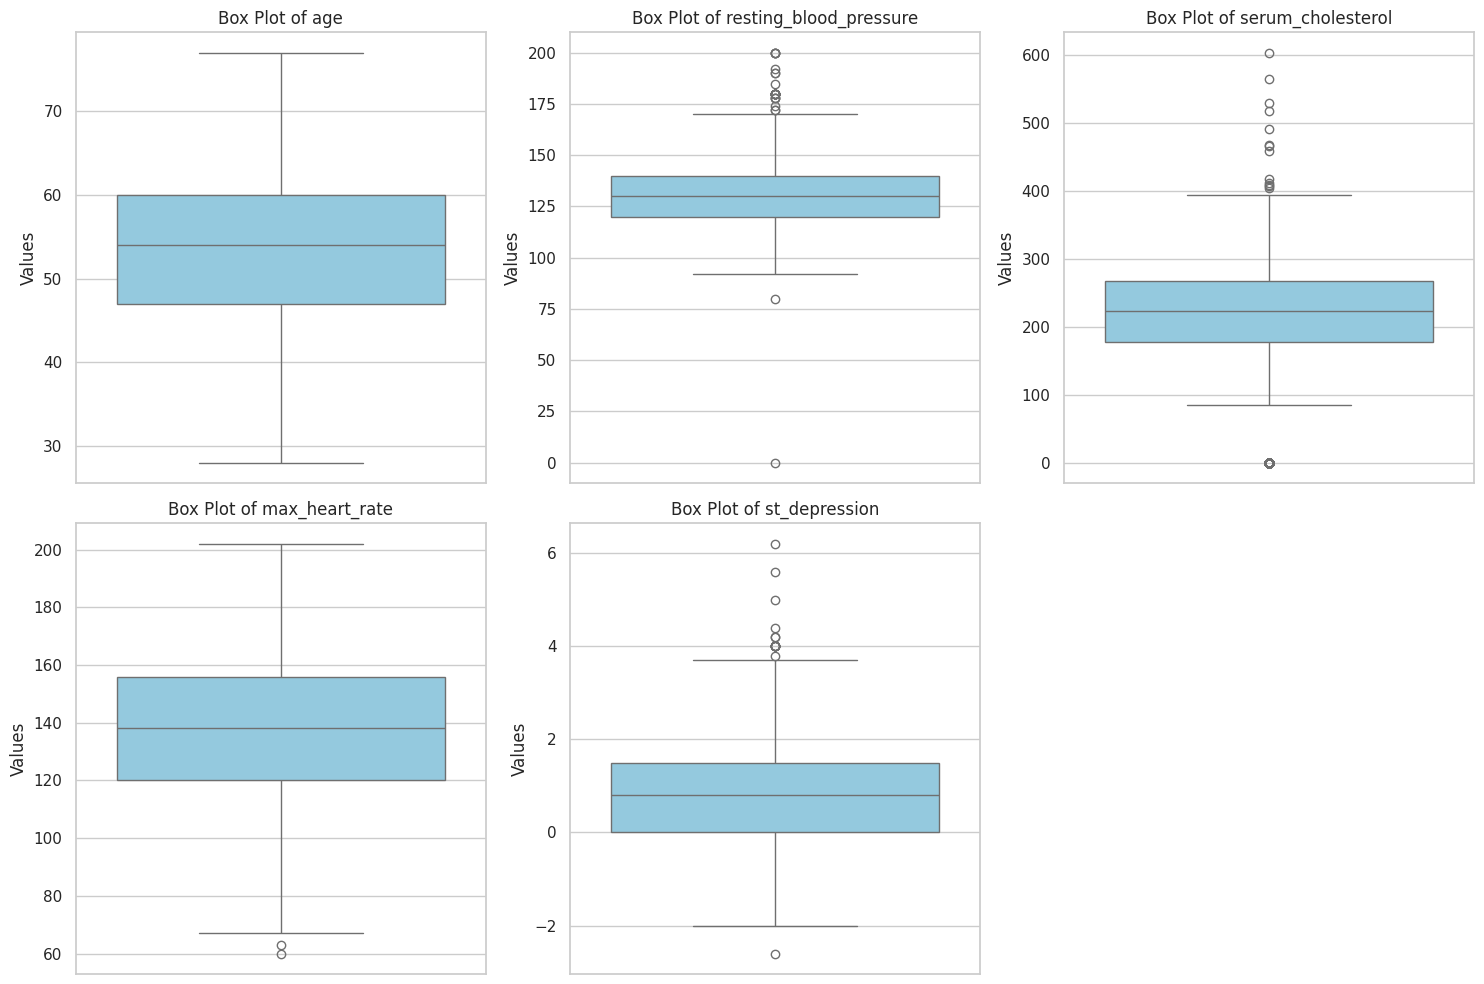

In [ ]:
numerical_columns = ['age', 'resting_blood_pressure', 'serum_cholesterol',
                     'max_heart_rate', 'st_depression']
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_cleaned, y=col, color='skyblue')
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.ylabel('Values')
    plt.xlabel('')

plt.tight_layout()
plt.show()


Outlier Detection Using Z-scores:

In [ ]:
z_scores = stats.zscore(df_cleaned.select_dtypes(include=['float64', 'int64']))
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]

#Confirm Outlier has been removed
print("\nShape of cleaned data (after removing outliers):")
print(df_cleaned.shape)


Shape of cleaned data (after removing outliers):
(904, 13)


#### Correlation Matrix (Spearman) for feature relationships

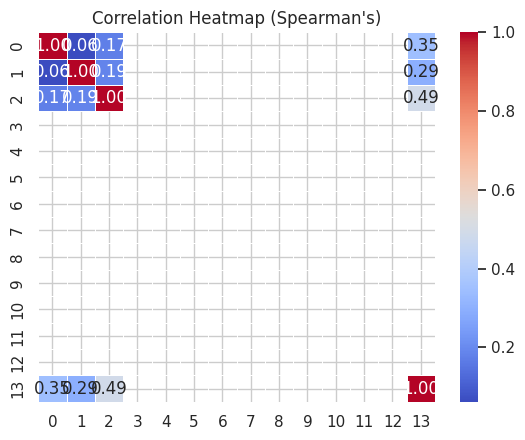

In [ ]:
corr_matrix, _ = spearmanr(df.select_dtypes(include=['float64', 'int64']))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap (Spearman's)")
plt.show()


In [ ]:
consolidated_facts = {
    'Metric': ['Number of Rows', 'Number of Columns', 'Number of Numeric Columns', 'Number of Non-Numeric Columns', 'Feature Types', 'Missing Values'],
    'Value': [df.shape[0], df.shape[1], df.select_dtypes(include='number').shape[1], df.select_dtypes(exclude='number').shape[1], dict(df.dtypes.value_counts()), df.isnull().sum().to_dict()]
}
consolidated_df = pd.DataFrame(consolidated_facts)

def style_table(val):
    if isinstance(val, dict):
        return 'background-color: lightblue; color: darkblue; '
    elif isinstance(val, int) and val == 0:
        return 'background-color: lightgreen; color: darkgreen; '
    elif isinstance(val, int) and val > 10:
        return 'background-color: lightcoral; color: darkred; '
    return 'background-color: lightyellow; color: darkorange; '

styled_df = consolidated_df.style.applymap(style_table, subset=['Value']).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('padding', '10px'), ('border', '1px solid #ddd')]},
    {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
    {'selector': 'tr:hover', 'props': [('background-color', '#ddd')]}  # Hover effect
])

styled_df

<ipython-input-195-2da436dbdafa>:16: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Metric,Value
0,Number of Rows,920
1,Number of Columns,14
2,Number of Numeric Columns,14
3,Number of Non-Numeric Columns,0
4,Feature Types,"{dtype('float64'): 10, dtype('int64'): 4}"
5,Missing Values,"{'age': 0, 'gender': 0, 'chest_pain_type': 0, 'resting_blood_pressure': 59, 'serum_cholesterol': 30, 'fasting_blood_sugar': 90, 'resting_electrocardiographic': 2, 'max_heart_rate': 55, 'exercise_induced_angina': 55, 'st_depression': 62, 'st_segment': 309, 'num_major_vessels': 611, 'thal': 486, 'class': 0}"


## Evaluation of Applied Machine Learning

Add content here for addressing Tasks 2.1 - 2.3.

**Update and create more cells as needed for both text and code!**


### Data Pre-processing

Due to the dataset showing class imbalance, SMOTE will be implemented. SMOTE is only used on the training data (X_train_processed) to balance the classes before model training.

Also investigate whether SMOTE improves the performanve model

In [ ]:
X = df_cleaned.drop('class', axis=1)
y = df_cleaned['class']

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessor to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to the training data to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Display the shapes to verify the split, processing, and resampling
print(f"Original training data shape: {X_train.shape}, {y_train.value_counts()}")
print(f"Resampled training data shape: {X_train_resampled.shape}, {y_train_resampled.value_counts()}")



Original training data shape: (723, 12), class
0    326
1    216
2     91
3     74
4     16
Name: count, dtype: int64
Resampled training data shape: (1630, 12), class
0    326
2    326
1    326
3    326
4    326
Name: count, dtype: int64


### Application of Machine Learning Models:



1.   Random Forest Classifier
2.   Logistic Regression



In [ ]:
# Utility function to report best scores
def report(results, rank_metric='score', n_top=3):
    """
    Utility function to report best scores.
    :param results: the cv_results_ data structure from the optimisation algorithm
    :param rank_metric: name of the metric to report results for
    :param n_top: the number of top results to report
    """
    print("\nModels ranked according to", rank_metric)
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_" + rank_metric] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f} (+/- {1:.2f})".format(
                  results["mean_test_" + rank_metric][candidate],
                  results["std_test_" + rank_metric][candidate]*2))
            print("Params: {0}".format(results['params'][candidate]))
            print("")

# Prepare the Random Forest model pipeline
rf_pipeline = imbpipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE to handle class imbalance
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5],
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

# Running GridSearchCV to tune the Random Forest model
print("\n> STARTING GRID SEARCH ...")
grid_search = GridSearchCV(rf_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

start_time = time()
grid_search.fit(X_train_resampled, y_train_resampled)  # Use the SMOTE resampled training data
end_time = time()

print("> GRID SEARCH COMPLETE")
print(f"GridSearchCV took {end_time - start_time:.2f} seconds for {len(grid_search.cv_results_['params'])} candidate parameter settings.")

report(grid_search.cv_results_)

# Evaluate the best model found by GridSearchCV
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_processed)  # Test on the processed test data

# Performance metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Print evaluation metrics for the best model
print(f"Best Model - Accuracy: {accuracy_best:.4f}")
print(f"Best Model - Precision: {precision_best:.4f}")
print(f"Best Model - Recall: {recall_best:.4f}")
print(f"Best Model - F1 Score: {f1_best:.4f}")



> STARTING GRID SEARCH ...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 526, in fit
    self._final_estimator.fit(Xt, yt, 

> GRID SEARCH COMPLETE
GridSearchCV took 92.51 seconds for 36 candidate parameter settings.

Models ranked according to score
Model with rank: 1
Mean validation score: 0.83 (+/- 0.09)
Params: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

Model with rank: 1
Mean validation score: 0.83 (+/- 0.09)
Params: {'rf__max_depth': None, 'rf__max_features': 'log2', 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

Model with rank: 3
Mean validation score: 0.83 (+/- 0.09)
Params: {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

Model with rank: 3
Mean validation score: 0.83 (+/- 0.09)
Params: {'rf__max_depth': 20, 'rf__max_features': 'log2', 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

Best Model - Accuracy: 0.5635
Best Model - Precision: 0.5325
Best Model - Recall: 0.5635
Best Model - F1 Score: 0.5430


Logistic Regression:

In [ ]:
def report(results, rank_metric='score', n_top=3):
    """
    Utility function to report best scores.
    :param results: the cv_results_ data structure from the optimisation algorithm
    :param rank_metric: name of the metric to report results for
    :param n_top: the number of top results to report
    """
    print("\nModels ranked according to", rank_metric)
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_" + rank_metric] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f} (+/- {1:.2f})".format(
                  results["mean_test_" + rank_metric][candidate],
                  results["std_test_" + rank_metric][candidate]*2))
            print("Params: {0}".format(results['params'][candidate]))
            print("")

# Create the Logistic Regression pipeline
logreg_pipeline = imbpipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE to handle class imbalance
    ('logreg', LogisticRegression(random_state=42))  # Logistic Regression model
])

# Define the hyperparameter grid for Logistic Regression
logreg_param_grid = {
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['liblinear', 'saga']
}

# Running GridSearchCV to tune the Logistic Regression model
print("\n> STARTING GRID SEARCH ...")
logreg_grid_search = GridSearchCV(logreg_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

start_time = time()
logreg_grid_search.fit(X_train_resampled, y_train_resampled)  # Using resampled training data (with SMOTE)
end_time = time()

print("> GRID SEARCH COMPLETE")
print(f"GridSearchCV took {end_time - start_time:.2f} seconds for {len(logreg_grid_search.cv_results_['params'])} candidate parameter settings.")

report(logreg_grid_search.cv_results_)

logreg_best_model = logreg_grid_search.best_estimator_
y_pred_logreg_best = logreg_best_model.predict(X_test_processed)

accuracy_logreg_best = accuracy_score(y_test, y_pred_logreg_best)
precision_logreg_best = precision_score(y_test, y_pred_logreg_best, average='weighted')
recall_logreg_best = recall_score(y_test, y_pred_logreg_best, average='weighted')
f1_logreg_best = f1_score(y_test, y_pred_logreg_best, average='weighted')

print(f"Best Logistic Regression Model - Accuracy: {accuracy_logreg_best:.4f}")
print(f"Best Logistic Regression Model - Precision: {precision_logreg_best:.4f}")
print(f"Best Logistic Regression Model - Recall: {recall_logreg_best:.4f}")
print(f"Best Logistic Regression Model - F1 Score: {f1_logreg_best:.4f}")



> STARTING GRID SEARCH ...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
> GRID SEARCH COMPLETE
GridSearchCV took 1.06 seconds for 6 candidate parameter settings.

Models ranked according to score
Model with rank: 1
Mean validation score: 0.57 (+/- 0.07)
Params: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}

Model with rank: 2
Mean validation score: 0.56 (+/- 0.08)
Params: {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}

Model with rank: 3
Mean validation score: 0.56 (+/- 0.08)
Params: {'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}

Best Logistic Regression Model - Accuracy: 0.5470
Best Logistic Regression Model - Precision: 0.5671
Best Logistic Regression Model - Recall: 0.5470
Best Logistic Regression Model - F1 Score: 0.5538


Comparison of ML models:

In [ ]:
# Random Forest and Logistic Regression performance
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_logreg_best:.4f}")
print(f"Precision: {precision_logreg_best:.4f}")
print(f"Recall: {recall_logreg_best:.4f}")
print(f"F1 Score: {f1_logreg_best:.4f}")



Random Forest Performance:
Accuracy: 0.5635
Precision: 0.5325
Recall: 0.5635
F1 Score: 0.5430

Logistic Regression Performance:
Accuracy: 0.5470
Precision: 0.5671
Recall: 0.5470
F1 Score: 0.5538


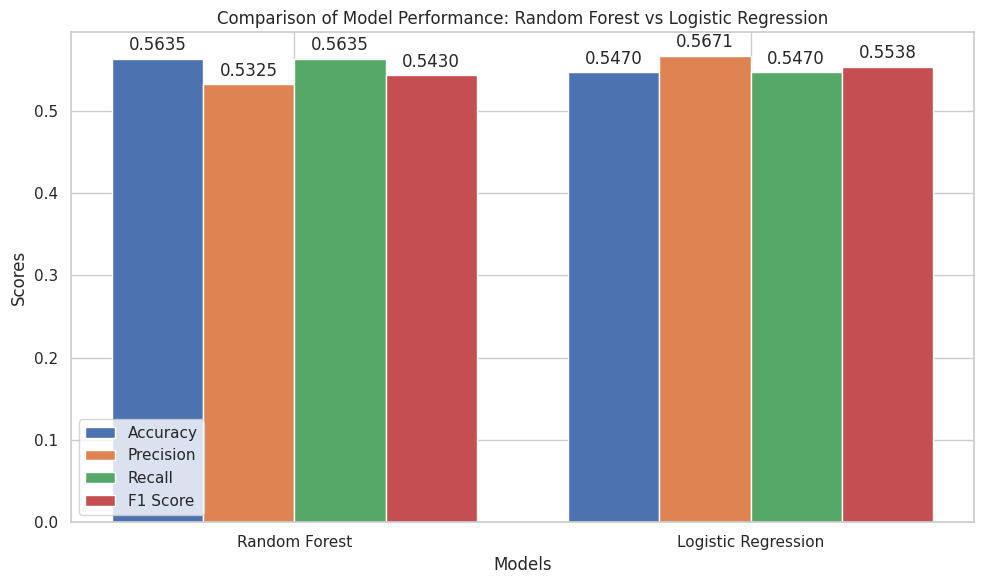

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'Logistic Regression']
accuracy = [0.5635, 0.5470]
precision = [0.5325, 0.5671]
recall = [0.5635, 0.5470]
f1_score = [0.5430, 0.5538]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance: Random Forest vs Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.tight_layout()
plt.show()


**Effectiveness of the models**:


In terms of forecasting heart disease, the models we used—Random Forest and Logistic Regression—have performed moderately well. Recall, accuracy, precision, and F1 scores were all within acceptable bounds for both models. Neither model, however, performed at its best (The Random Forest model had an accuracy of 56.35% and Logistic Regression 54.70%), , suggesting that further advancements are necessary to adequately address the issue of heart disease prediction.

The Random Forest model showed a higher recall than Logistic Regression, which means it was slightly better at identifying patients who actually had heart disease. However, this came at the cost of lower precision, resulting in more false positive predictions (incorrectly labeling healthy patients as diseased). The Logistic Regression model, on the other hand, showed better precision, meaning fewer healthy patients were misclassified as diseased, but it had a slightly lower recall, potentially missing some actual heart disease cases.

False positives and false negatives have major ramifications in a real-world situation where heart disease detection is vital. False negatives especially pose a threat as they can let people with heart disease go untreated undiscovered. Though less immediately detrimental, false positives might lead to pointless tests, treatments, and psychological anguish. Consequently, in this situation the efficiency of both models may be seen as restricted.